In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('feature_engineered_laptop.csv')
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,Price_euros,TouchScreen,HDD,SSD,SSHD,FStorage
0,Apple,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1339.69,No,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,Intel i5,8,macOS,1.34,898.94,No,0,0,0,128
2,HP,Notebook,15.6,1920x1080,Intel i5,8,No OS,1.86,575.00,No,0,256,0,0
3,Apple,Ultrabook,15.4,2880x1800,Intel i7,16,macOS,1.83,2537.45,No,0,512,0,0
4,Apple,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,1803.60,No,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel i7,4,Windows 10,1.80,638.00,Yes,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel i7,16,Windows 10,1.30,1499.00,Yes,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron,2,Windows 10,1.50,229.00,No,0,0,0,64
1301,HP,Notebook,15.6,1366x768,Intel i7,6,Windows 10,2.19,764.00,No,1000,0,0,0


In [22]:
#moved price column to the end

df['Price']= df['Price_euros']
df.drop(columns=['Price_euros'], inplace = True)
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,OpSys,Weight,TouchScreen,HDD,SSD,SSHD,FStorage,Price
0,Apple,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,No,0,128,0,0,1339.69
1,Apple,Ultrabook,13.3,1440x900,Intel i5,8,macOS,1.34,No,0,0,0,128,898.94
2,HP,Notebook,15.6,1920x1080,Intel i5,8,No OS,1.86,No,0,256,0,0,575.00
3,Apple,Ultrabook,15.4,2880x1800,Intel i7,16,macOS,1.83,No,0,512,0,0,2537.45
4,Apple,Ultrabook,13.3,2560x1600,Intel i5,8,macOS,1.37,No,0,256,0,0,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Intel i7,4,Windows 10,1.80,Yes,0,128,0,0,638.00
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Intel i7,16,Windows 10,1.30,Yes,0,512,0,0,1499.00
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron,2,Windows 10,1.50,No,0,0,0,64,229.00
1301,HP,Notebook,15.6,1366x768,Intel i7,6,Windows 10,2.19,No,1000,0,0,0,764.00


# EDA

In [23]:
df.shape

(1303, 14)

<AxesSubplot:xlabel='Company', ylabel='Price'>

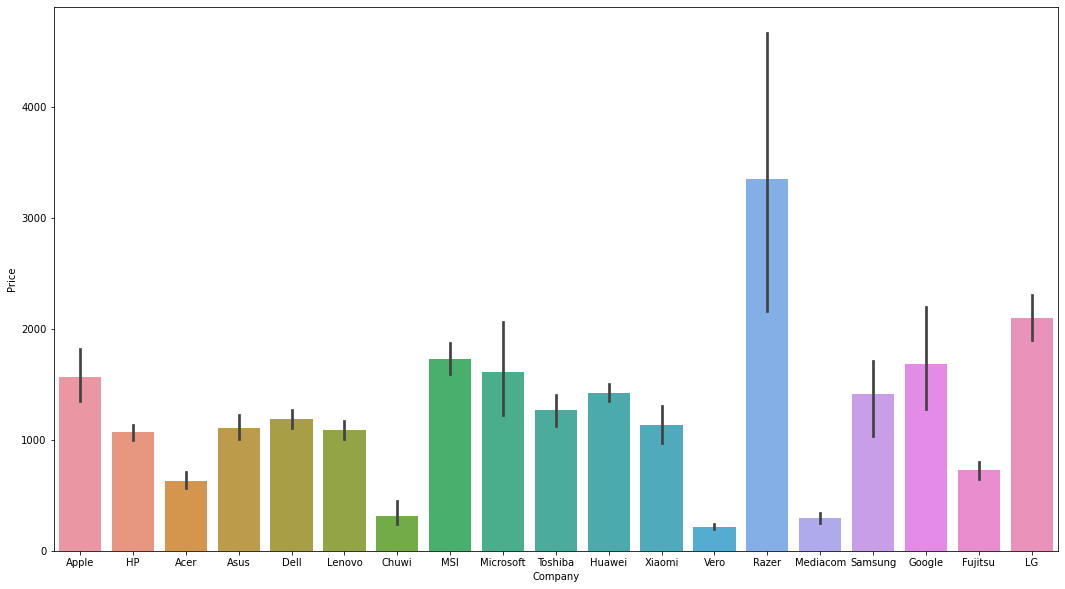

In [24]:
import seaborn as sns
plt.subplots(figsize=(18,10))
sns.barplot(x='Company',y='Price',data=df)

From the graph above , we can see that Razer branded laptops are significantly higher priced than other branded laptops. Apple branded laptops are also higher priced than other laptop brands (HP, Acer, Asus ...etc). Brands such as LG and Google however seem to have a higher price point than Apple products (which is not expected before plotting this graph), therefore more analysis is needed to fully understand the data

In [25]:
standby_df = df.loc[df['Company'].str.contains('Apple|Google|LG')]
standby_df.groupby(['Company']).mean()


,Inches,Ram,Weight,HDD,SSD,SSHD,FStorage,Price
Company,,,,,,,,
Apple,13.247619,9.333333,1.320476,0.0,188.952381,0.0,134.095238,1564.198571
Google,12.300000,10.666667,1.100000,0.0,298.666667,0.0,0.000000,1677.666667
LG,15.066667,10.666667,1.050000,0.0,512.000000,0.0,0.000000,2099.000000


Here we can see that, on average, LG and Google laptops are lighter than Apple laptops, have more RAM and SSD capacity than apple laptops. This explains why LG and Google laptops are higher priced than Apple laptops.

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

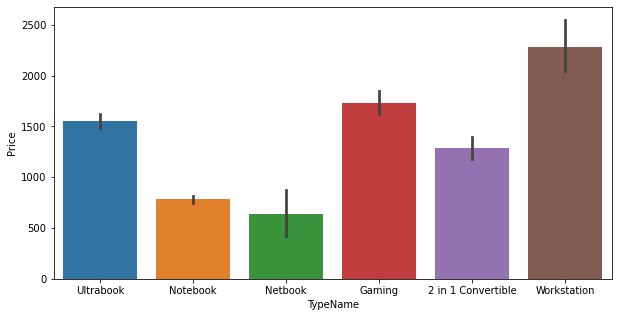

In [26]:
plt.subplots(figsize=(10,5))
sns.barplot(x='TypeName',y='Price',data=df)

As can be seen, on average, workstation laptops are higher priced than other category of laptops. This is to be expected as workstation laptops have higher spec configurations (better cpu, more memory, faster clockspeed, etc) to meet the demands of clients in the proffesional workspace.

Gaming laptops present the second highest priced category of laptops due to the same reasons as above.

Ultrabooks and 2 in 1 convertibles are cheaper than gaming laptops (on average). 

Notebooks and netbooks are relatively cheaper than other category of laptops.

<AxesSubplot:xlabel='Inches', ylabel='Price'>

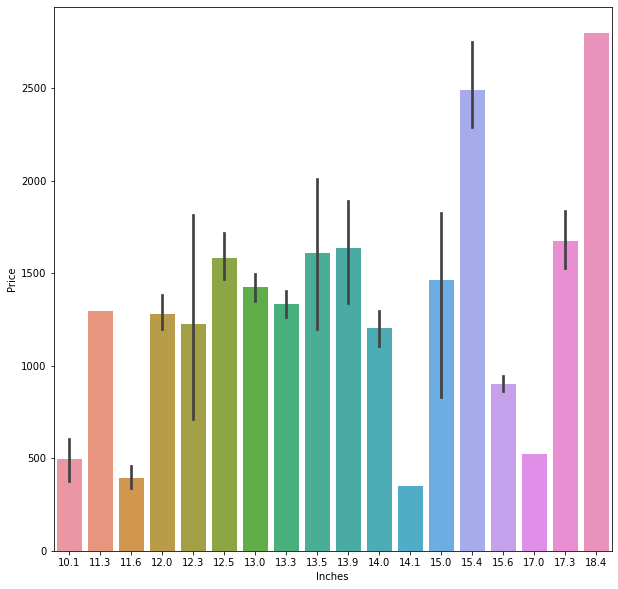

In [27]:
plt.subplots(figsize=(10,10))
sns.barplot(x='Inches',y='Price',data=df)

Here we can see that the price of laptops can't solely be judge through the size of their displays (no direct linear correlation between screen size and price). This feature will still be kept for modelling later (high variance).

<AxesSubplot:xlabel='ScreenResolution', ylabel='Price'>

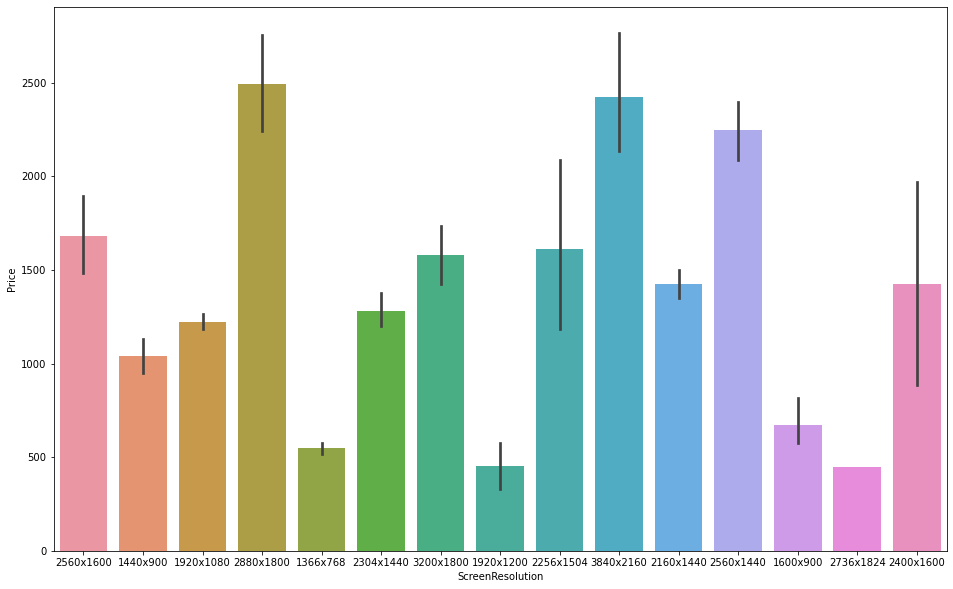

In [28]:
plt.subplots(figsize=(16,10))
sns.barplot(x='ScreenResolution',y='Price',data=df)

Screens have higher resolutions are generally higher priced. However , an outlier resolution , specifically (2736 * 1824) is lower priced than others. 



In [29]:
resolutionList = list(df['ScreenResolution'].unique())

print("%-20s%s"%("Resoltuion","Count"))
for i in resolutionList:
    print("%-20s%d"%(i,list(df['ScreenResolution']).count(i)))


Resoltuion          Count
2560x1600           6
1440x900            4
1920x1080           841
2880x1800           4
1366x768            308
2304x1440           6
3200x1800           27
1920x1200           5
2256x1504           6
3840x2160           43
2160x1440           2
2560x1440           23
1600x900            23
2736x1824           1
2400x1600           4


Since there's only 1 laptop with outlier resolution (2736 x 1824), this laptop would be removed.

In [30]:
#REmoval of laptop with outlier resolution
df = df.loc[~df['ScreenResolution'].str.contains('2736x1824')]
df['ScreenResolution'].unique()
print(df.shape)

(1302, 14)


<AxesSubplot:xlabel='TouchScreen', ylabel='Price'>

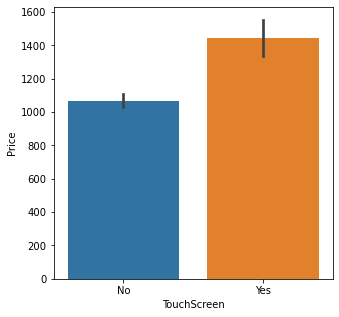

In [31]:
plt.subplots(figsize=(5,5))
sns.barplot(x='TouchScreen',y='Price',data=df)

Laptops with touchscreen capabilities are priced higher on average.

<AxesSubplot:xlabel='Cpu', ylabel='Price'>

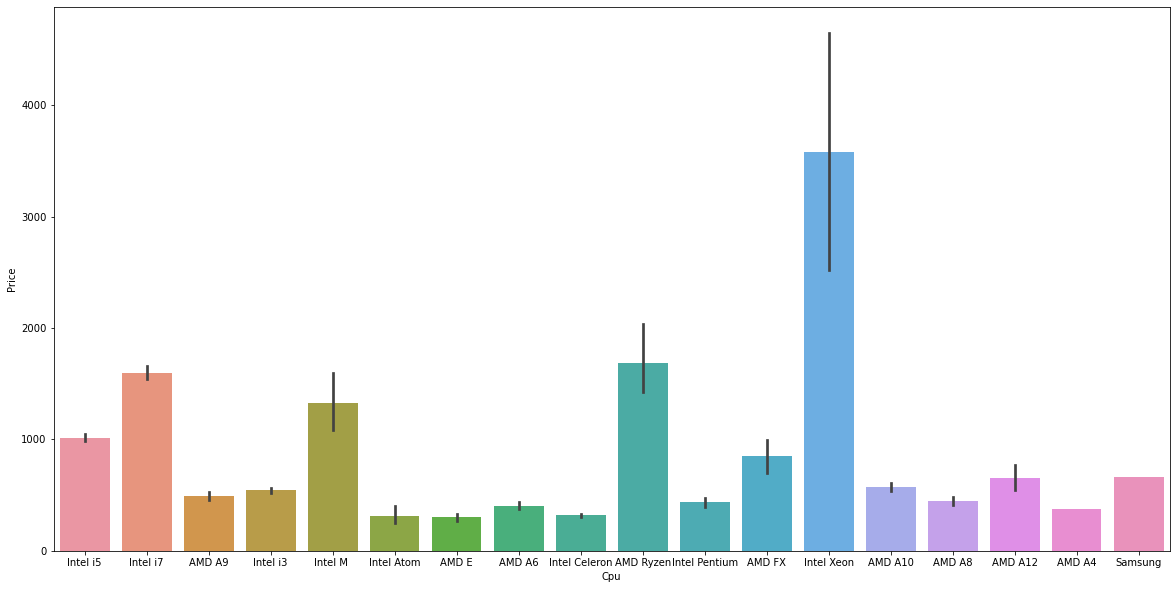

In [32]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Cpu',y='Price',data=df)

Higher powered processors/CPU are generally higher priced (Xeon > i7>i5>i3). The same goes for AMD CPus (Ryzen > AMD A series> E series...). Interestingly, laptops with intel M processors are higher priced than intel i5 processors (which is not expected as intel core M processors are lower powered CPUs). 

In [33]:
standby_df = df.loc[df['Cpu'].str.contains('Intel M |Intel i5')]
standby_df.groupby(['Cpu']).mean()

,Inches,Ram,Weight,HDD,SSD,SSHD,FStorage,Price
Cpu,,,,,,,,
Intel M,12.521053,7.789474,1.088421,0.000000,255.157895,0.000000,87.578947,1324.231579
Intel i5,14.802600,6.959811,1.900095,325.361702,159.659574,5.929078,3.026005,1015.015248


As shown above, Intel M laptops a higher average in RAM capacity and SSD capacity than Intel i5 laptops. Intel M laptops are also much lighter than Intel i5 laptops. These factors contribute to the higher average prices for intel M laptops.

<AxesSubplot:xlabel='Ram', ylabel='Price'>

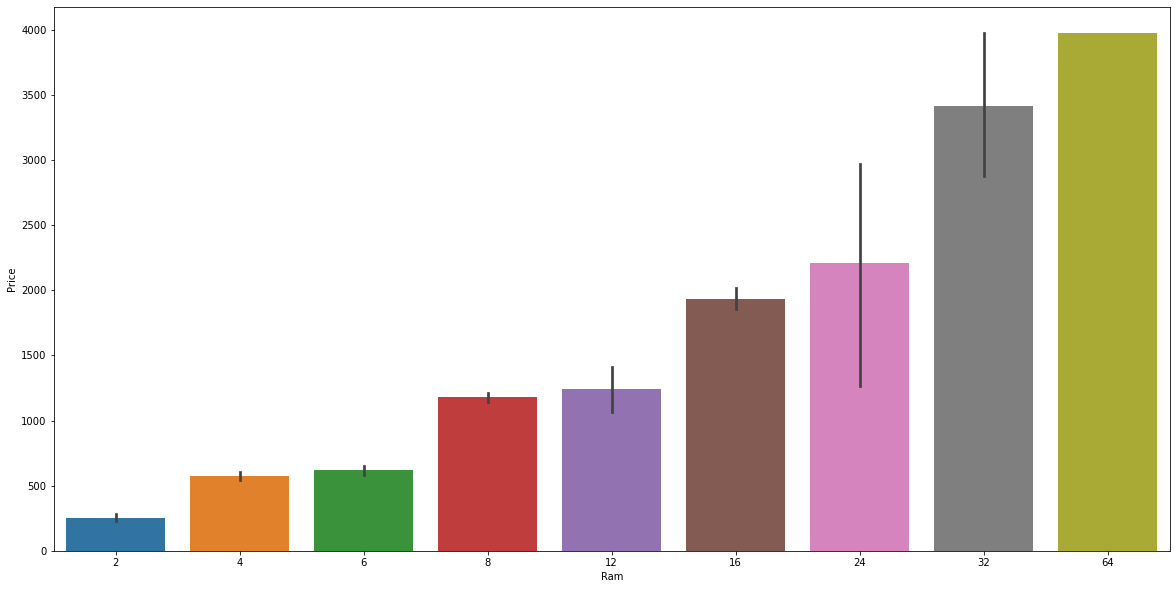

In [34]:
plt.subplots(figsize=(20,10))
sns.barplot(x='Ram',y='Price',data=df)

laptops with higher ram shows higher prices

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

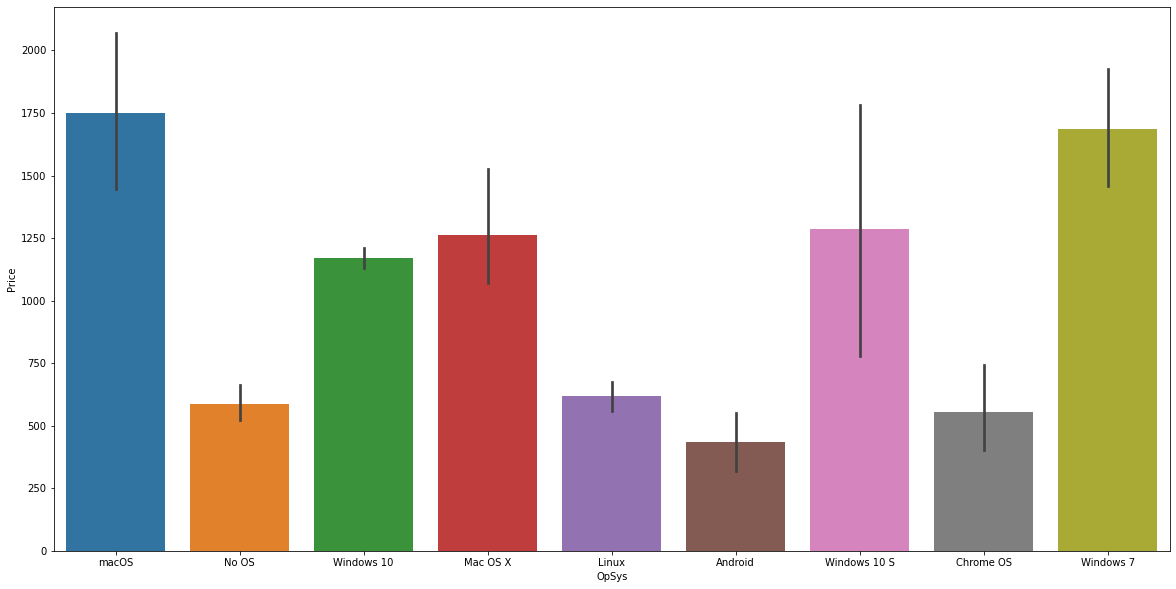

In [35]:
plt.subplots(figsize=(20,10))
sns.barplot(x='OpSys',y='Price',data=df)

In [36]:
df.corr()

,Inches,Ram,Weight,HDD,SSD,SSHD,FStorage,Price
Inches,1.000000,0.237658,0.827674,0.531531,-0.109293,0.054003,-0.227583,0.066901
Ram,0.237658,1.000000,0.383697,0.097622,0.603827,0.038430,-0.059563,0.742988
Weight,0.827674,0.383697,1.000000,0.515695,-0.063402,0.095119,-0.178792,0.209803
HDD,0.531531,0.097622,0.515695,1.000000,-0.400639,-0.076773,-0.116794,-0.096326
SSD,-0.109293,0.603827,-0.063402,-0.400639,1.000000,-0.059862,-0.146829,0.670799
SSHD,0.054003,0.038430,0.095119,-0.076773,-0.059862,1.000000,-0.014246,0.007921
FStorage,-0.227583,-0.059563,-0.178792,-0.116794,-0.146829,-0.014246,1.000000,-0.039126
Price,0.066901,0.742988,0.209803,-0.096326,0.670799,0.007921,-0.039126,1.000000


<AxesSubplot:>

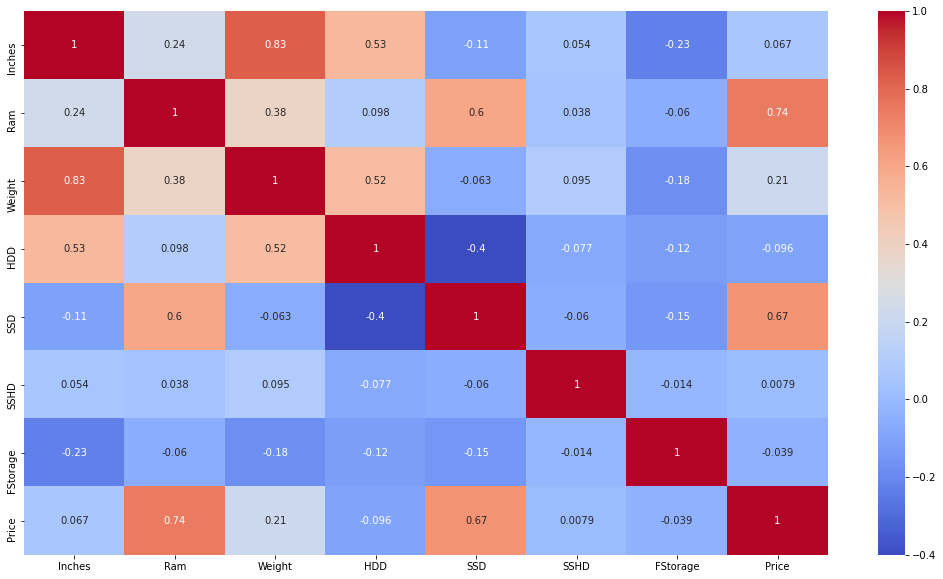

In [37]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(),annot=True, cmap="coolwarm")

# Saving EDA-ed data to csv file

In [38]:
df.to_csv('EDA-ed_Laptop.csv',index=False)